In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Ruta de la carpeta principal que contiene los datos
folder_path = '/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/'

meses = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]

trn_01 = ["02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15"]
trn_25 = ["02"]
tst = ["02", "03", "04", "05"]

df_i = pd.DataFrame()
df_o = pd.DataFrame()
t_df_i = pd.DataFrame()
t_df_o = pd.DataFrame()

session = "01"


# Train
file_path = folder_path + session +  "/" + "trn01rss.csv"
df_i = pd.concat([df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

file_path = folder_path + session +  "/" + "trn01crd.csv"
df_o = pd.concat([df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

file_path = folder_path + session +  "/"+"trn01rss.csv"
df_i = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/"+ "trn01crd.csv"
df_o = pd.read_csv(file_path, header=None)


# Test
file_path = folder_path + session +  "/"+ "tst01rss.csv"
t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

file_path =folder_path + session +  "/"+"tst01crd.csv"
t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

for rep in tst:

  file_path = folder_path + session +  "/" + "tst"+ rep +"rss.csv"
  t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

  file_path =folder_path + session +  "/" + "tst"+ rep +"crd.csv"
  t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)



# Cambia los valores de la planta por metros. La planta 3 será 0 metros, la planta 5 serán 3.7 metros
df_o.iloc[:, 2] = df_o.iloc[:, 2].replace({3: 0, 5: 3.7})
# Igual para el de test
t_df_o.iloc[:, 2] = t_df_o.iloc[:, 2].replace({3: 0, 5: 3.7})





In [ ]:
X_train = df_i
X_test = t_df_i
y_train = df_o
y_test = t_df_o

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time

start_train = time.time()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
predictions = rf.predict(X_test)
end_pred = time.time()

errores = []

for i in range(len(X_test)):
    distancia_euclidea = np.linalg.norm(y_test.iloc[i,:].values - predictions[i])
    errores.append(distancia_euclidea)

media = np.mean(errores)
desv_est = np.std(errores)
minimo = np.min(errores)
maximo = np.max(errores)
tiempo_train = end_train - start_train
tiempo_pred = end_pred - start_pred

resultados = {
    "mes": [],
    "media": [],
    "desv_est": [],
    "minimo": [],
    "maximo": [],
    "tiempo_train": [],
    "tiempo_pred": []
}

# Almacenar resultados en el diccionario
resultados["mes"].append("01")
resultados["media"].append(media)
resultados["desv_est"].append(desv_est)
resultados["minimo"].append(minimo)
resultados["maximo"].append(maximo)
resultados["tiempo_train"].append(tiempo_train)
resultados["tiempo_pred"].append(tiempo_pred)

In [ ]:
for session in range(1, len(meses)):
    mes = meses[session]

    df_i = pd.DataFrame()
    df_o = pd.DataFrame()
    t_df_i = pd.DataFrame()
    t_df_o = pd.DataFrame()

    # Train
    file_path = folder_path + mes + "/" + "trn01rss.csv"
    df_i = pd.concat([df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

    file_path = folder_path + mes + "/" + "trn01crd.csv"
    df_o = pd.concat([df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

    df_o.iloc[:, 2] = df_o.iloc[:, 2].replace({3: 0, 5: 3.7})

    # Calcular el número de filas a sustituir (5%)
    num_rows_to_replace = int(len(X_train) * 0.15)
    random_rows_indices = np.random.choice(len(X_train), num_rows_to_replace, replace=False)
    random_rows = X_train.iloc[random_rows_indices]

    for index, row in random_rows.iterrows():
        X_train.loc[index] = df_i.loc[index]
        y_train.loc[index] = df_o.loc[index]

    # Test
    file_path = folder_path + mes + "/" + "tst01rss.csv"
    t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

    file_path = folder_path + mes + "/" + "tst01crd.csv"
    t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

    X_test = t_df_i
    y_test = t_df_o

    for rep in tst:
        file_path = folder_path + mes + "/" + "tst" + rep + "rss.csv"
        t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

        file_path = folder_path + mes + "/" + "tst" + rep + "crd.csv"
        t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

    X_test = t_df_i
    y_test = t_df_o

    # Random Forest
    start_train = time.time()
    rf.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    predictions = rf.predict(X_test)
    end_pred = time.time()

    errores = []

    for i in range(len(X_test)):
        distancia_euclidea = np.linalg.norm(y_test.iloc[i,:].values - predictions[i])
        errores.append(distancia_euclidea)

    media = np.mean(errores)
    desv_est = np.std(errores)
    minimo = np.min(errores)
    maximo = np.max(errores)
    tiempo_train = end_train - start_train
    tiempo_pred = end_pred - start_pred

    # Almacenar resultados en el diccionario
    resultados["mes"].append(mes)
    resultados["media"].append(media)
    resultados["desv_est"].append(desv_est)
    resultados["minimo"].append(minimo)
    resultados["maximo"].append(maximo)
    resultados["tiempo_train"].append(tiempo_train)
    resultados["tiempo_pred"].append(tiempo_pred)

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)


   mes     media  desv_est    minimo     maximo  tiempo_train  tiempo_pred
0   01  3.308687  1.910503  0.069314  10.861575      2.948974     0.151617
1   02  3.814892  1.311130  1.369665  10.843975      1.965900     0.068016
2   03  3.727944  1.335677  1.302961   9.845925      2.157700     0.141942
3   04  3.594837  1.211551  1.303522   8.899713      0.979153     0.055707
4   05  3.494203  1.199182  1.301232   9.383778      0.963238     0.038909
5   06  3.583819  1.227931  1.312240  10.704441      1.496915     0.054434
6   07  3.587925  1.278218  1.302350  11.128492      0.998445     0.047741
7   08  3.661484  1.369764  1.300492  11.871769      0.984437     0.037664
8   09  3.565003  1.159539  1.301232  11.324734      1.049345     0.042567
9   10  3.622750  1.273707  1.306653  10.788534      0.985803     0.040330
10  11  4.154860  1.434081  0.391456   9.374990      1.071851     0.043637
11  12  3.877637  1.526064  1.312255  11.469566      1.062194     0.035946
12  13  3.786279  1.39697

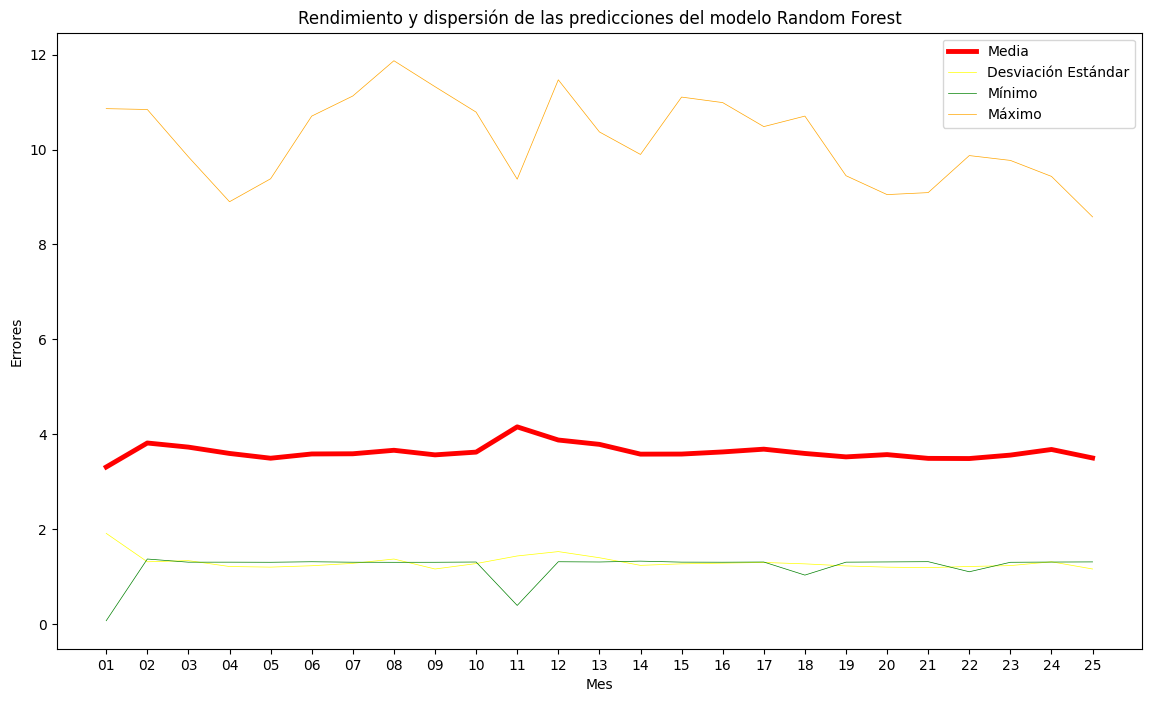

In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Mostrar la tabla de resultados
print(resultados_df)

plt.figure(figsize=(14, 8))
plt.plot(resultados_df["mes"], resultados_df["media"], label='Media', color='red', linewidth=3.5, linestyle='-')
plt.plot(resultados_df["mes"], resultados_df["desv_est"], label='Desviación Estándar', linewidth=0.5, color='yellow')
plt.plot(resultados_df["mes"], resultados_df["minimo"], label='Mínimo', color='green', linewidth=0.5)
plt.plot(resultados_df["mes"], resultados_df["maximo"], label='Máximo', color='orange', linewidth=0.5)

plt.xlabel('Mes')
plt.ylabel('Errores')
plt.title('Rendimiento y dispersión de las predicciones del modelo Random Forest')
plt.legend()
plt.show()
